In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns

# 0. Data

Source & Description: https://archive.ics.uci.edu/dataset/352/online+retail

In [6]:
df = pd.read_csv("./data.csv")

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df = df.dropna(subset=['CustomerID'])

In [10]:
df.shape

(406829, 8)

# 1. New vs. Repeat Customers

In [11]:
df = df.dropna()

In [12]:
df = df.loc[
    df["Quantity"] > 0
]
df["Sales"] = df["Quantity"] * df["UnitPrice"]

In [13]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

/var/folders/cc/n153cd2x6qq8w175v23xx6zh0000gn/T/ipykernel_4528/3012402086.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [14]:
df["month"] = df["InvoiceDate"].dt.strftime("%Y-%m-01")

In [15]:
monthly_data = []
prev_customers = set()

for each_month in sorted(df["month"].unique()):
    up_to_last_month_df = df.loc[
        df["month"] < each_month
    ]
    this_month_df = df.loc[
        df["month"] == each_month
    ]
    curr_customers = set(this_month_df["CustomerID"].unique())
    # prev_customers = set(up_to_last_month_df["CustomerID"].unique())
    
    repeat_customers = curr_customers.intersection(prev_customers)
    new_customers = curr_customers - prev_customers
    
    curr_sales = this_month_df["Sales"].sum()
    
    sales_from_new_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(new_customers)
    ]["Sales"].sum()
    sales_from_repeat_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(repeat_customers)
    ]["Sales"].sum()
    
    avg_sales_from_new_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(new_customers)
    ]["Sales"].mean()
    avg_sales_from_repeat_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(repeat_customers)
    ]["Sales"].mean()
    
    monthly_data.append({
        "month": each_month,
        
        "num_customers": len(curr_customers),
        "repeat_customers": len(repeat_customers),
        "new_customers": len(new_customers),
        
        "curr_sales": curr_sales,
        "sales_from_new_customers": sales_from_new_customers,
        "sales_from_repeat_customers": sales_from_repeat_customers,
        "avg_sales_from_new_customers": avg_sales_from_new_customers,
        "avg_sales_from_repeat_customers": avg_sales_from_repeat_customers,
    })
    
    prev_customers = curr_customers
    

In [16]:
monthly_data_df = pd.DataFrame(monthly_data).set_index("month").iloc[1:-1]
monthly_data_df["repeat_customer_percentage"] = monthly_data_df["repeat_customers"]/monthly_data_df["num_customers"]
monthly_data_df["repeat_sales_percentage"] = monthly_data_df["sales_from_repeat_customers"]/monthly_data_df["curr_sales"]

In [17]:
monthly_data_df

,num_customers,repeat_customers,new_customers,curr_sales,sales_from_new_customers,sales_from_repeat_customers,avg_sales_from_new_customers,avg_sales_from_repeat_customers,repeat_customer_percentage,repeat_sales_percentage
month,,,,,,,,,,
2011-01-01,741,324,417,569445.040,293207.350,276237.69,26.556231,27.106044,0.437247,0.485100
2011-02-01,758,262,496,447137.350,231473.830,215663.52,19.583234,26.598855,0.345646,0.482321
2011-03-01,974,290,684,595500.760,319702.950,275797.81,17.621284,30.528870,0.297741,0.463136
2011-04-01,856,304,552,469200.361,253718.341,215482.02,17.907845,25.422607,0.355140,0.459254
2011-05-01,1056,368,688,678594.560,315313.570,363280.99,19.417056,30.065463,0.348485,0.535343
2011-06-01,991,410,581,661213.690,282523.930,378689.76,19.063693,30.625941,0.413724,0.572719
2011-07-01,949,365,584,600091.011,277990.051,322100.96,18.917322,26.549700,0.384615,0.536754
2011-08-01,935,388,547,645343.900,291684.930,353658.97,19.624903,29.107734,0.414973,0.548016
2011-09-01,1266,425,841,952838.382,426368.452,526469.93,18.074885,32.021771,0.335703,0.552528


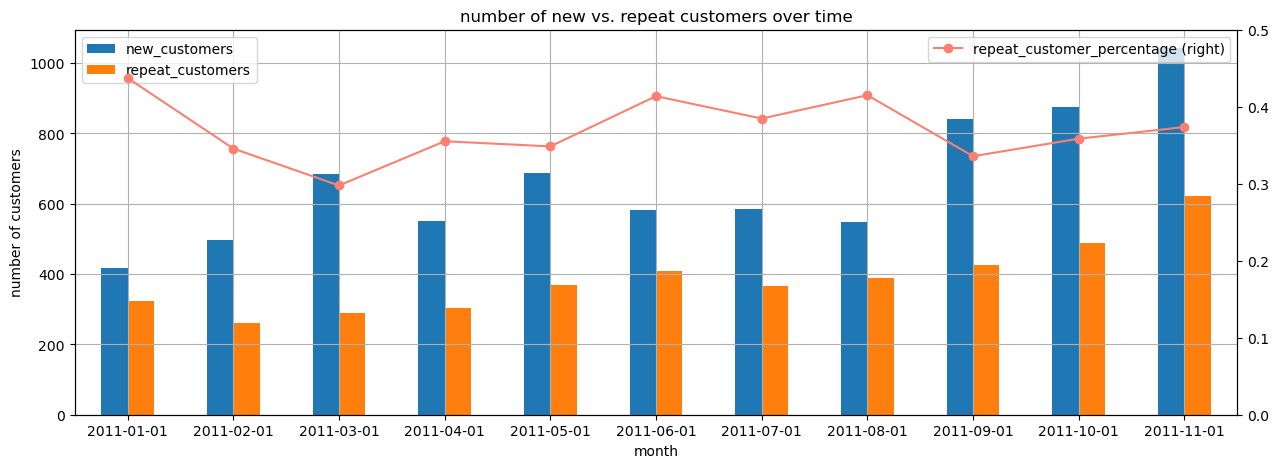

In [18]:
ax = monthly_data_df[["new_customers", "repeat_customers"]].plot(kind="bar", grid=True, figsize=(15,5))
monthly_data_df["repeat_customer_percentage"].plot(ax=ax, secondary_y=True, color="salmon", style="-o")
ax.right_ax.legend()
ax.right_ax.set_ylim([0, 0.5])
ax.set_ylabel("number of customers")
ax.set_title("number of new vs. repeat customers over time")
plt.show()

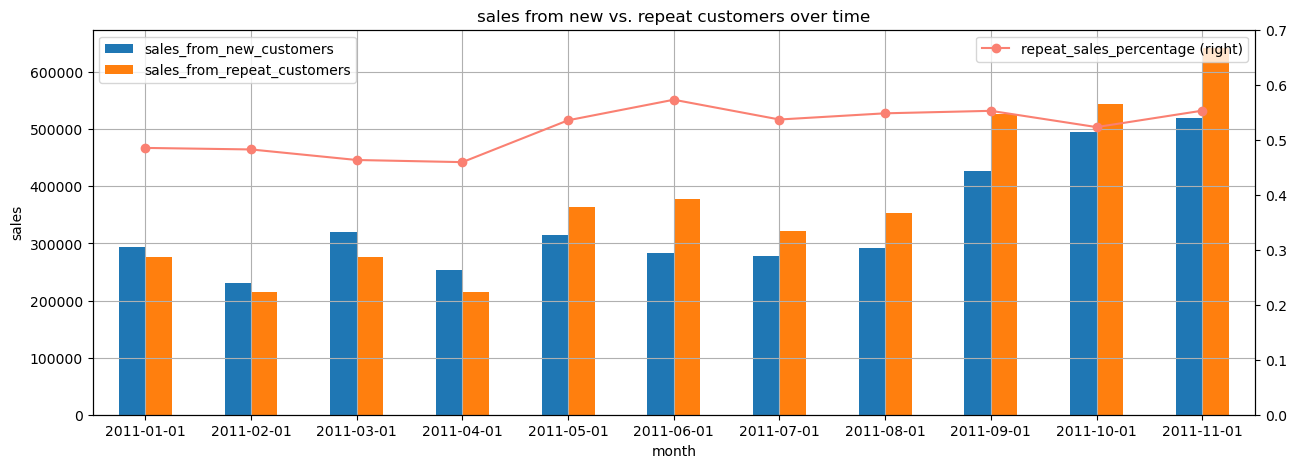

In [19]:
ax = monthly_data_df[["sales_from_new_customers", "sales_from_repeat_customers"]].plot(kind="bar", grid=True, figsize=(15,5))
monthly_data_df["repeat_sales_percentage"].plot(ax=ax, secondary_y=True, color="salmon", style="-o")
ax.set_ylabel("sales")
ax.set_title("sales from new vs. repeat customers over time")
ax.right_ax.legend()
ax.right_ax.set_ylim([0, 0.7])
plt.show()

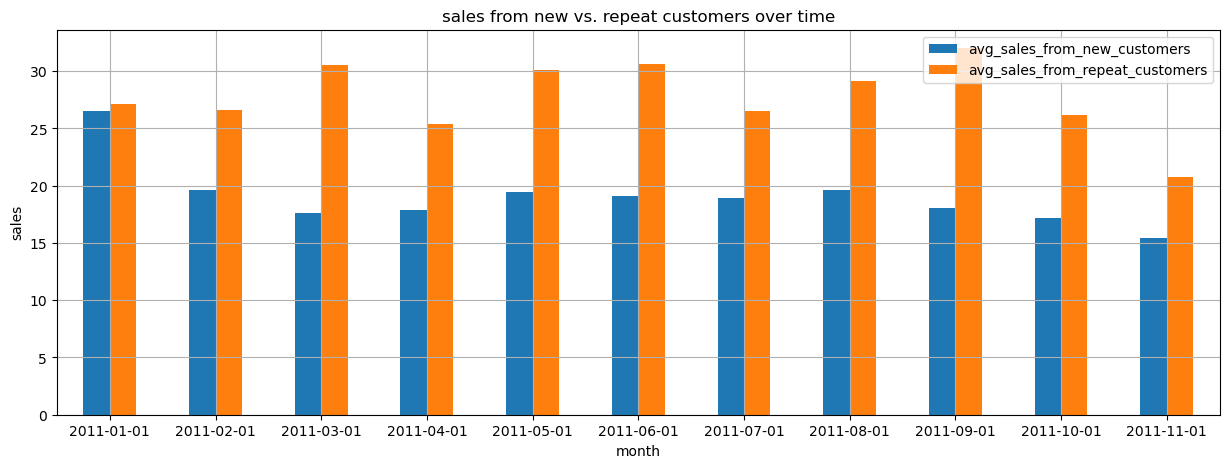

In [20]:
ax = monthly_data_df[["avg_sales_from_new_customers", "avg_sales_from_repeat_customers"]].plot(kind="bar", grid=True, figsize=(15,5), rot=0)
ax.set_ylabel("sales")
ax.set_title("sales from new vs. repeat customers over time")
plt.show()

# 2. Customer Segmentation with Purchase Behaviors

## 2.1. Data Prep

In [11]:
df["CustomerID"].nunique()

4372

In [12]:
df["Sales"] = df["Quantity"] * df["UnitPrice"]

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [14]:
(df["Quantity"] < 0).sum()

8905

In [15]:
customer_net_df = df.groupby('CustomerID')[["Sales", "Quantity"]].sum()

customer_net_df.columns = ['NetSales', 'NetQuantity']
customer_net_df['AvgNetOrderValue'] = customer_net_df['NetSales']/customer_net_df['NetQuantity']
customer_net_df['AvgNetOrderValue'] = customer_net_df['AvgNetOrderValue'].replace(np.inf, 0)
customer_net_df

,NetSales,NetQuantity,AvgNetOrderValue
CustomerID,,,
12346.0,0.00,0,NaN
12347.0,4310.00,2458,1.753458
12348.0,1797.24,2341,0.767723
12349.0,1757.55,631,2.785341
12350.0,334.40,197,1.697462
...,...,...,...
18280.0,180.60,45,4.013333
18281.0,80.82,54,1.496667
18282.0,176.60,98,1.802041


In [16]:
customer_refund_df = df.loc[
    df["Quantity"] < 0
].groupby("CustomerID")[["Sales", "Quantity"]].sum().abs()

customer_refund_df.columns = ['TotalRefund', 'TotalRefundQuantity']

customer_refund_df

,TotalRefund,TotalRefundQuantity
CustomerID,,
12346.0,77183.60,74215
12352.0,960.63,66
12359.0,127.05,10
12362.0,71.65,17
12365.0,320.69,1
...,...,...
18272.0,13.80,6
18274.0,175.92,88
18276.0,12.50,2


In [17]:
customer_purchase_df = df.loc[
    df["Quantity"] > 0
].groupby("CustomerID")[["Sales", "Quantity"]].sum().abs()

customer_purchase_df.columns = ['TotalPurchase', 'TotalPurchaseQuantity']

customer_purchase_df

,TotalPurchase,TotalPurchaseQuantity
CustomerID,,
12346.0,77183.60,74215
12347.0,4310.00,2458
12348.0,1797.24,2341
12349.0,1757.55,631
12350.0,334.40,197
...,...,...
18280.0,180.60,45
18281.0,80.82,54
18282.0,178.05,103


In [18]:
customer_df = customer_net_df.merge(
    customer_purchase_df, left_index=True, right_index=True, how="left"
).merge(
    customer_refund_df, left_index=True, right_index=True, how="left"
).fillna(0)

customer_df

,NetSales,NetQuantity,AvgNetOrderValue,TotalPurchase,TotalPurchaseQuantity,TotalRefund,TotalRefundQuantity
CustomerID,,,,,,,
12346.0,0.00,0,0.000000,77183.60,74215.0,77183.60,74215.0
12347.0,4310.00,2458,1.753458,4310.00,2458.0,0.00,0.0
12348.0,1797.24,2341,0.767723,1797.24,2341.0,0.00,0.0
12349.0,1757.55,631,2.785341,1757.55,631.0,0.00,0.0
12350.0,334.40,197,1.697462,334.40,197.0,0.00,0.0
...,...,...,...,...,...,...,...
18280.0,180.60,45,4.013333,180.60,45.0,0.00,0.0
18281.0,80.82,54,1.496667,80.82,54.0,0.00,0.0
18282.0,176.60,98,1.802041,178.05,103.0,1.45,5.0


In [19]:
customer_df.describe() # LARGE STD compared to Mean suggests highly skewed data

,NetSales,NetQuantity,AvgNetOrderValue,TotalPurchase,TotalPurchaseQuantity,TotalRefund,TotalRefundQuantity
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,1898.459701,1122.344007,4.613497,2038.290920,1185.200366,139.831219,62.856359
std,8219.345141,4672.790720,78.579894,8956.019171,5037.543325,2952.494447,1683.595484
min,-4287.630000,-303.000000,-4.075000,0.000000,0.000000,0.000000,0.000000
25%,293.362500,153.000000,1.400398,303.602500,157.000000,0.000000,0.000000
50%,648.075000,365.000000,1.799530,665.315000,374.500000,0.000000,0.000000
75%,1611.725000,962.250000,2.348391,1652.790000,983.000000,16.500000,4.000000
max,279489.020000,196719.000000,4287.630000,280206.020000,197491.000000,168469.600000,80995.000000


/var/folders/cc/n153cd2x6qq8w175v23xx6zh0000gn/T/ipykernel_4352/706469634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df[col])
/Users/yoonhyuph/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


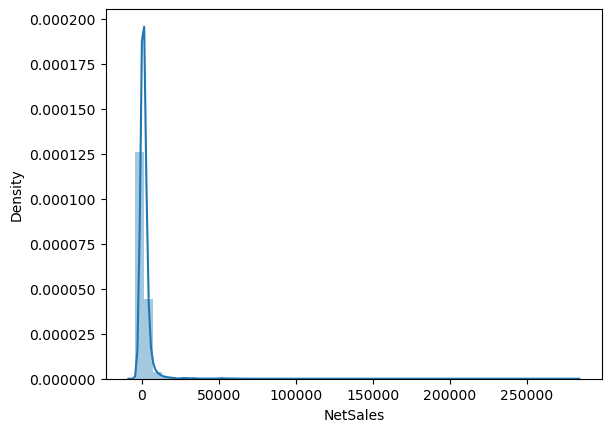

/var/folders/cc/n153cd2x6qq8w175v23xx6zh0000gn/T/ipykernel_4352/706469634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df[col])
/Users/yoonhyuph/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


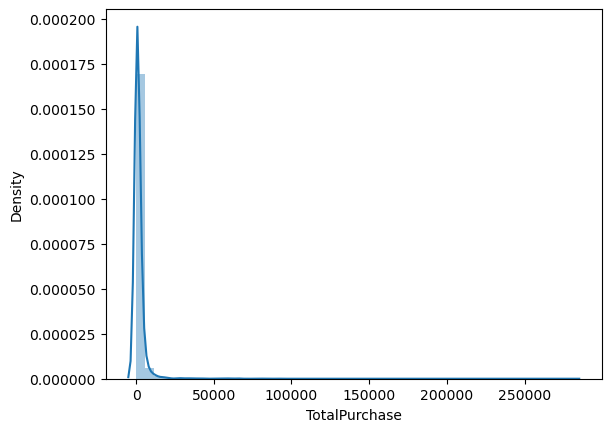

/var/folders/cc/n153cd2x6qq8w175v23xx6zh0000gn/T/ipykernel_4352/706469634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df[col])
/Users/yoonhyuph/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


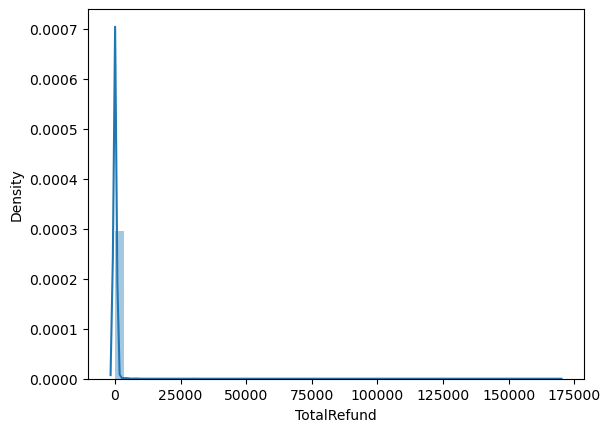

In [20]:
for col in ["NetSales", "TotalPurchase", "TotalRefund"]:
    sns.distplot(customer_df[col])
    plt.show()

/var/folders/cc/n153cd2x6qq8w175v23xx6zh0000gn/T/ipykernel_4352/2436698146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(customer_df[col] - customer_df[col].min() + 1))
/Users/yoonhyuph/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


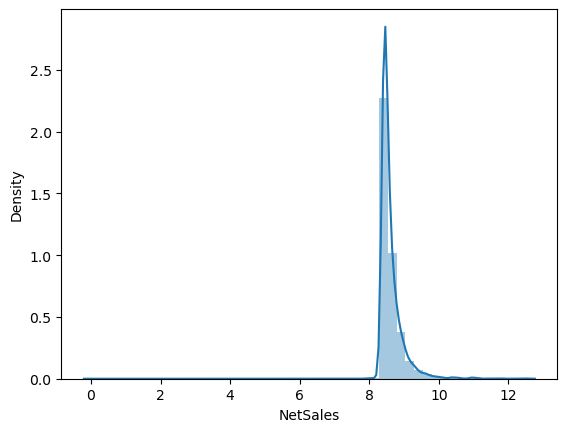

/var/folders/cc/n153cd2x6qq8w175v23xx6zh0000gn/T/ipykernel_4352/2436698146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(customer_df[col] - customer_df[col].min() + 1))
/Users/yoonhyuph/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


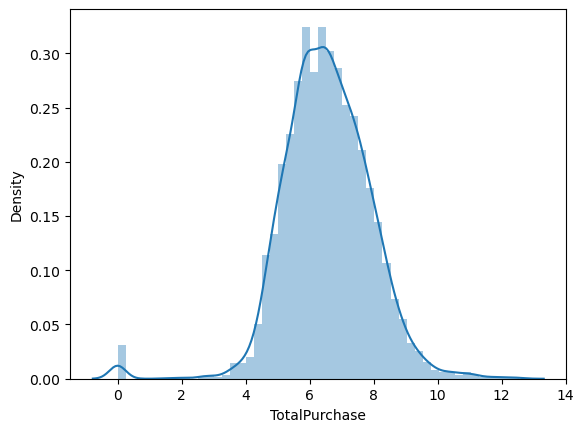

/var/folders/cc/n153cd2x6qq8w175v23xx6zh0000gn/T/ipykernel_4352/2436698146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(customer_df[col] - customer_df[col].min() + 1))
/Users/yoonhyuph/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


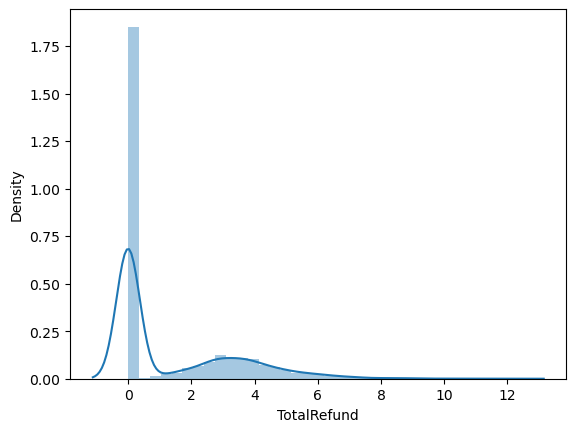

In [21]:
for col in ["NetSales", "TotalPurchase", "TotalRefund"]:
    sns.distplot(np.log(customer_df[col] - customer_df[col].min() + 1))
    plt.show()

In [22]:
log_customer_df = np.log(customer_df - customer_df.min() + 1)
log_customer_df.describe()

,NetSales,NetQuantity,AvgNetOrderValue,TotalPurchase,TotalPurchaseQuantity,TotalRefund,TotalRefundQuantity
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,8.616538,6.719784,1.965686,6.542350,5.941882,1.334799,0.915773
std,0.363968,0.807619,0.280267,1.380126,1.460770,1.988179,1.522898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.429889,6.124683,1.868010,5.719007,5.062595,0.000000,0.000000
50%,8.504453,6.505784,1.927823,6.501762,5.928258,0.000000,0.000000
75%,8.682768,7.143815,2.004636,7.410825,6.891626,2.862201,1.609438
max,12.555946,12.191076,8.364672,12.543284,12.193453,12.034517,11.302155


In [23]:
rank_df = customer_df.rank(method='first')
rank_df.describe()

,NetSales,NetQuantity,AvgNetOrderValue,TotalPurchase,TotalPurchaseQuantity,TotalRefund,TotalRefundQuantity
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,2186.500000,2186.500000,2186.500000,2186.500000,2186.500000,2186.500000,2186.500000
std,1262.232018,1262.232018,1262.232018,1262.232018,1262.232018,1262.232018,1262.232018
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1093.750000,1093.750000,1093.750000,1093.750000,1093.750000,1093.750000,1093.750000
50%,2186.500000,2186.500000,2186.500000,2186.500000,2186.500000,2186.500000,2186.500000
75%,3279.250000,3279.250000,3279.250000,3279.250000,3279.250000,3279.250000,3279.250000
max,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000


## 2.2. K-Means Clustering

In [24]:
from sklearn.cluster import KMeans

In [25]:
import matplotlib.colors as mcolors

In [26]:
colors = list(mcolors.TABLEAU_COLORS.values())
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [27]:
def plot_clusters(c_df, col1, col2):
    clusters = sorted(c_df["cluster"].unique())
    for c in clusters:
        plt.scatter(
            c_df.loc[c_df['cluster'] == c][col1], 
            c_df.loc[c_df['cluster'] == c][col2],
            c=colors[c]
        )

    plt.title(f'{col1} vs. {col2} Clusters')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(clusters)
    plt.show()

### 2.2.1. Without Centering & Handling Skewness

In [28]:
COLS = ['NetSales', 'TotalPurchase', 'TotalRefund']
kmeans = KMeans(
    n_clusters=4, n_init="auto"
).fit(
    customer_df[COLS]
)

In [29]:
kmeans.labels_

array([3, 0, 0, ..., 0, 0, 0], dtype=int32)

In [30]:
kmeans.cluster_centers_

array([[1.16813973e+03, 1.20151936e+03, 3.33796355e+01],
       [2.41136560e+05, 2.44804703e+05, 3.66814333e+03],
       [1.53837038e+04, 1.67650278e+04, 1.38132400e+03],
       [6.30209200e+04, 8.18606288e+04, 1.88397088e+04]])

In [31]:
cluster_df = customer_df[COLS].copy()
cluster_df["cluster"] = kmeans.labels_

In [32]:
cluster_df.groupby('cluster')['NetSales'].count()

cluster
0    4252
1       3
2     100
3      17
Name: NetSales, dtype: int64

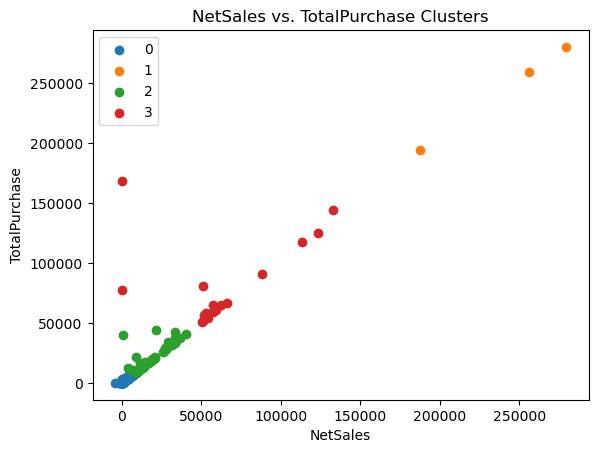

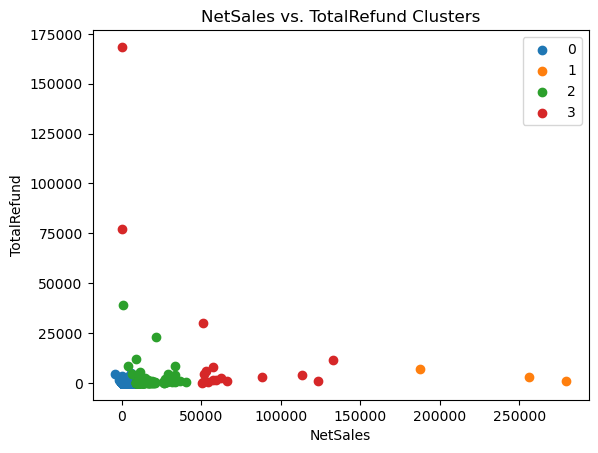

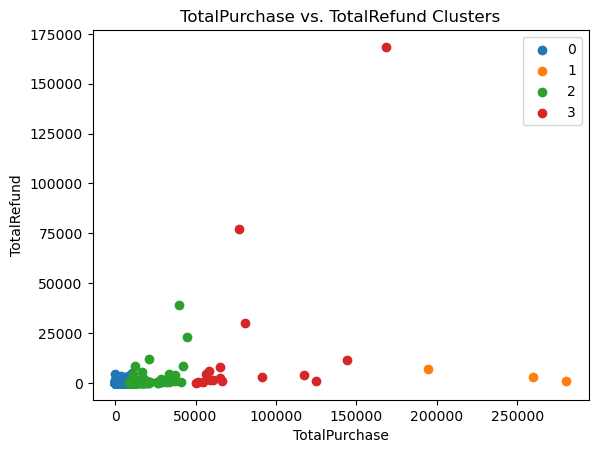

In [33]:
plot_clusters(cluster_df, "NetSales", "TotalPurchase")
plot_clusters(cluster_df, "NetSales", "TotalRefund")
plot_clusters(cluster_df, "TotalPurchase", "TotalRefund")

### 2.2.2. Log Transformed

In [34]:
COLS = ['NetSales', 'TotalPurchase', 'TotalRefund']
kmeans = KMeans(
    n_clusters=4, n_init="auto"
).fit(
    log_customer_df[COLS]
)

In [35]:
cluster_df = log_customer_df[COLS].copy()
cluster_df["cluster"] = kmeans.labels_

In [36]:
cluster_df.groupby('cluster')['NetSales'].count()

cluster
0    1027
1    2855
2     450
3      40
Name: NetSales, dtype: int64

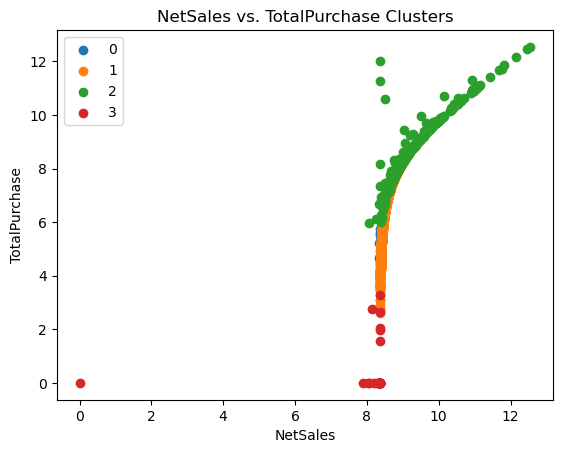

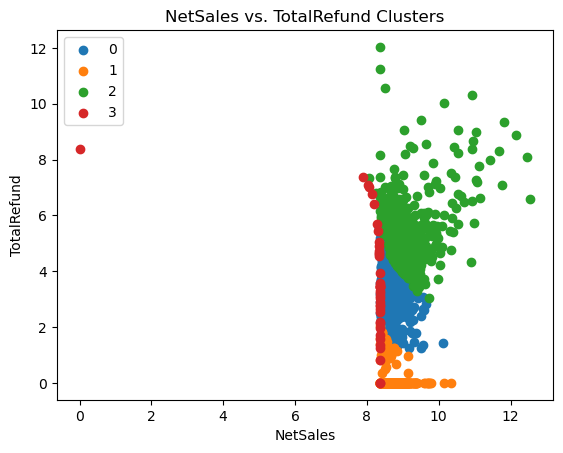

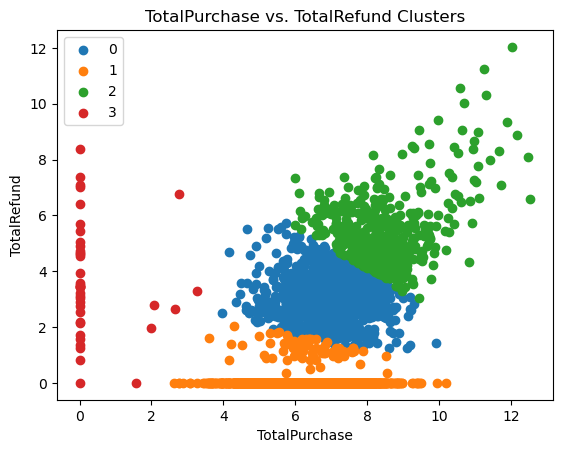

In [37]:
plot_clusters(cluster_df, "NetSales", "TotalPurchase")
plot_clusters(cluster_df, "NetSales", "TotalRefund")
plot_clusters(cluster_df, "TotalPurchase", "TotalRefund")

### 2.2.3. Ranked

#### 4 Clusters

In [38]:
COLS = ['NetSales', 'TotalPurchase', 'TotalRefund']
kmeans = KMeans(
    n_clusters=4, n_init="auto"
).fit(
    rank_df[COLS]
)

In [39]:
cluster_df = rank_df[COLS].copy()
cluster_df["cluster"] = kmeans.labels_

In [40]:
cluster_df.groupby('cluster')['NetSales'].count()

cluster
0    1020
1     853
2    1132
3    1367
Name: NetSales, dtype: int64

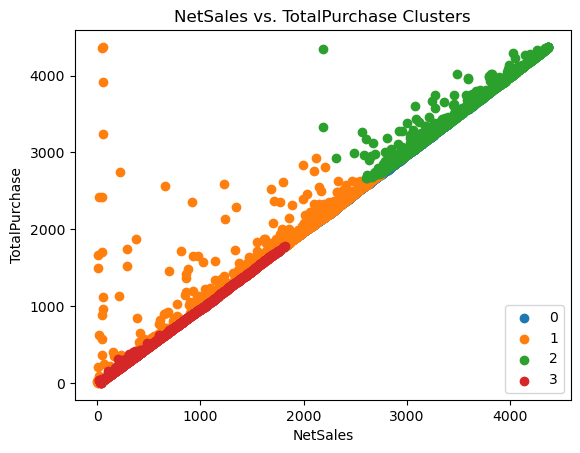

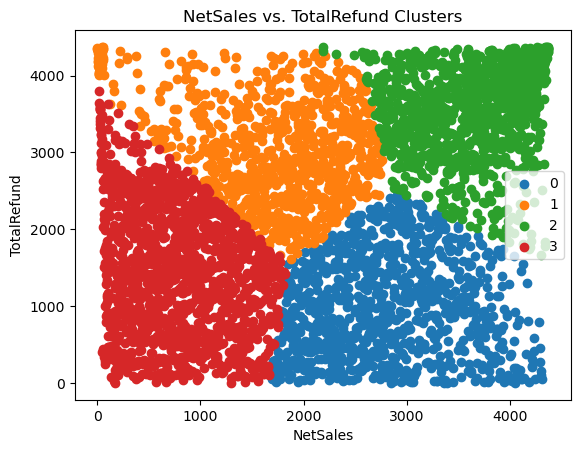

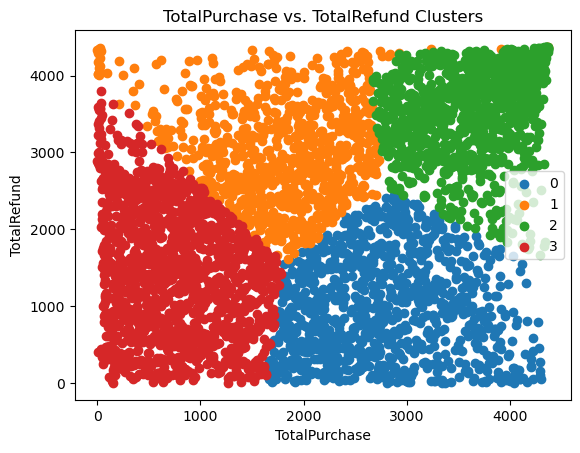

In [41]:
plot_clusters(cluster_df, "NetSales", "TotalPurchase")
plot_clusters(cluster_df, "NetSales", "TotalRefund")
plot_clusters(cluster_df, "TotalPurchase", "TotalRefund")

#### 8 Clusters

In [42]:
COLS = ['NetSales', 'TotalPurchase', 'TotalRefund']
kmeans = KMeans(
    n_clusters=8, n_init="auto"
).fit(
    rank_df[COLS]
)

In [43]:
cluster_df = rank_df[COLS].copy()
cluster_df["cluster"] = kmeans.labels_

In [44]:
cluster_df.groupby('cluster')['NetSales'].count()

cluster
0    581
1    609
2    398
3    688
4    551
5    668
6    483
7    394
Name: NetSales, dtype: int64

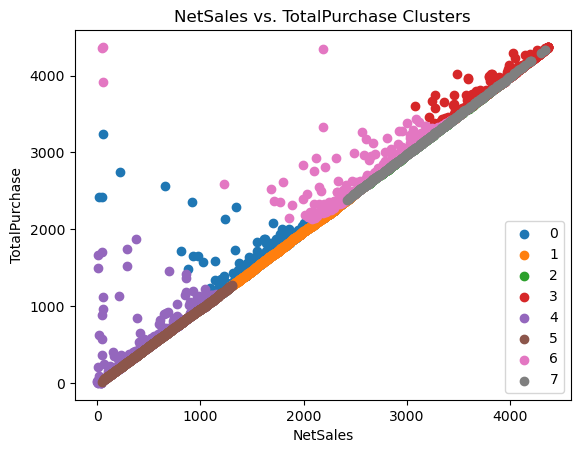

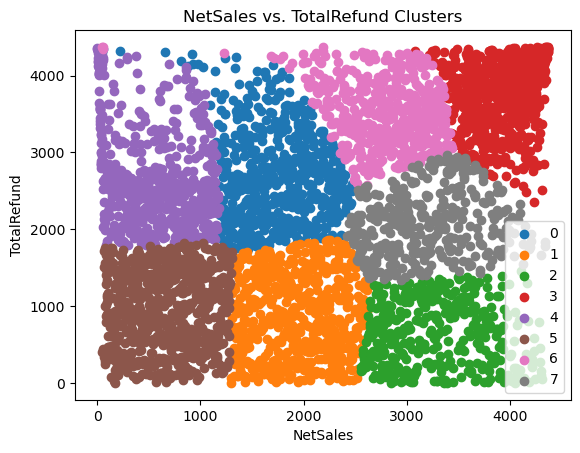

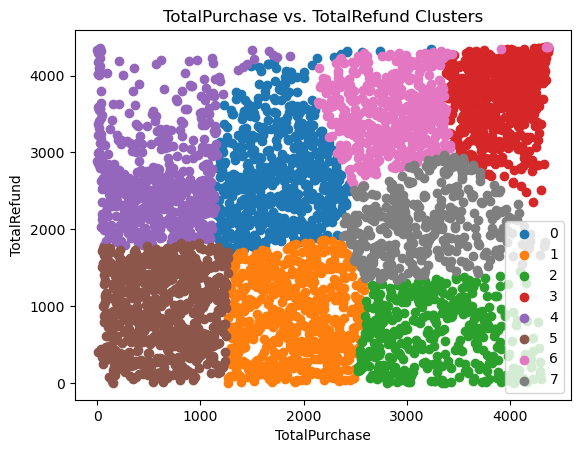

In [45]:
plot_clusters(cluster_df, "NetSales", "TotalPurchase")
plot_clusters(cluster_df, "NetSales", "TotalRefund")
plot_clusters(cluster_df, "TotalPurchase", "TotalRefund")

### 2.2.4. Finding the Best Number of Clusters

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [47]:
import matplotlib.cm as cm

Silhouette Score for 2 Clusters: 0.6098


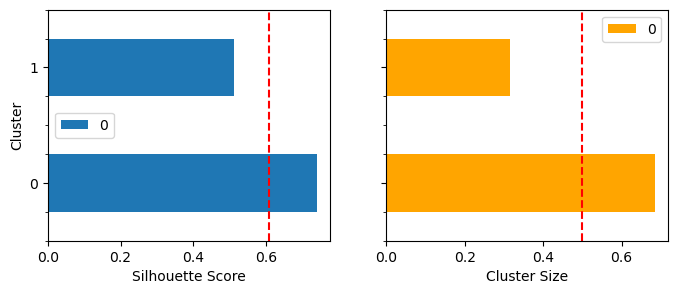

Silhouette Score for 3 Clusters: 0.5474


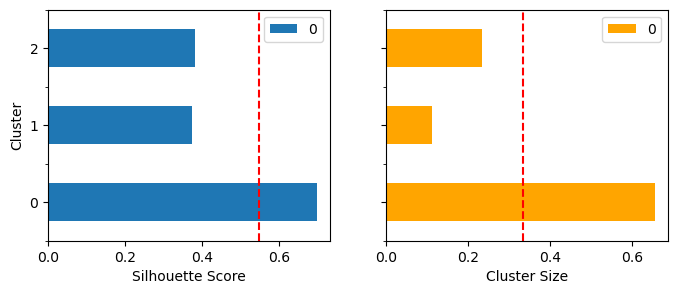

Silhouette Score for 4 Clusters: 0.4641


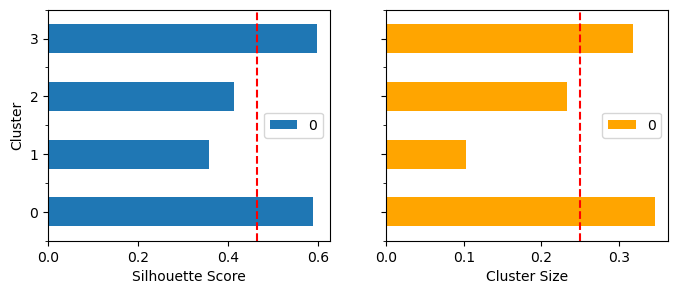

Silhouette Score for 5 Clusters: 0.4842


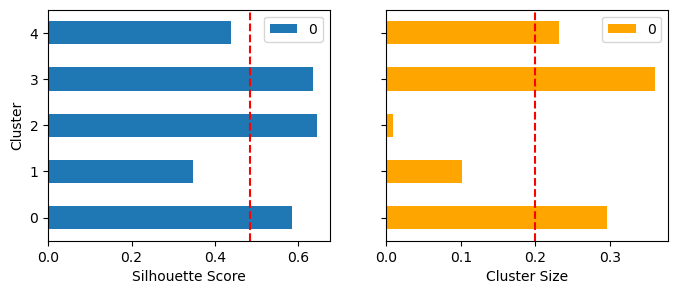

Silhouette Score for 6 Clusters: 0.4587


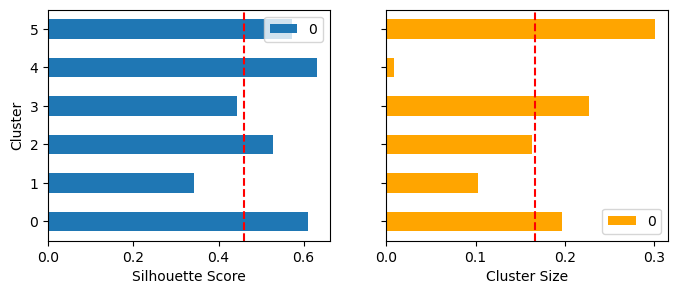

Silhouette Score for 7 Clusters: 0.4487


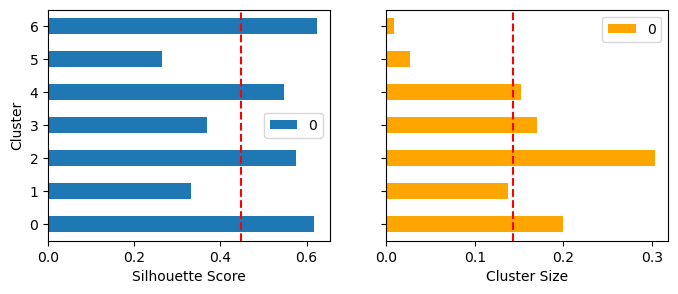

Silhouette Score for 8 Clusters: 0.4514


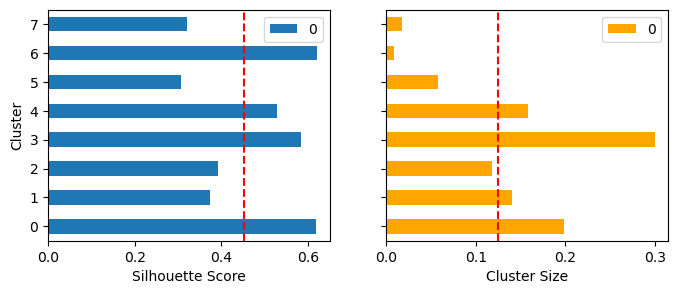

In [48]:
COLS = ['NetSales', 'TotalPurchase', 'TotalRefund']

for n_cluster in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster, n_init="auto").fit(
        log_customer_df[COLS]
    )
    silhouette_avg = silhouette_score(
        log_customer_df[COLS], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))
    
    # Compute the silhouette scores for each sample
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,3))
    svals = silhouette_samples(log_customer_df[COLS], kmeans.labels_)
    each_cluster_svals = [np.median(svals[kmeans.labels_ == i]) for i in range(n_cluster)]
    each_cluster_size = [len(svals[kmeans.labels_ == i])/len(kmeans.labels_) for i in range(n_cluster)]
    
    pd.DataFrame(each_cluster_svals).plot(ax=ax1, kind="barh")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_ylabel("Cluster")
    ax1.set_xlabel("Silhouette Score")
    
    pd.DataFrame(each_cluster_size).plot(ax=ax2, kind="barh", color="orange")
    ax2.axvline(x=(1/n_cluster), color="red", linestyle="--")
    ax2.set_xlabel("Cluster Size")
    plt.show()

# 3. Customer Segmentation with Product Interests

In [46]:
import spacy

In [47]:
from collections import Counter

In [48]:
nlp = spacy.load("en_core_web_sm")

In [49]:
df["Description"].nunique()

3896

In [50]:
%%time

descriptions = list(df["Description"].unique())
lemma_words = [
    [
        word.lemma_ for word in nlp(x.lower()) if word.pos_ in ["NOUN", "PROPN"] and len(word.lemma_) >= 3 
    ] for x in descriptions
]

CPU times: user 12.7 s, sys: 44.4 ms, total: 12.8 s
Wall time: 12.8 s


In [52]:
inverse_doc_map = {}
for i, words in enumerate(lemma_words):
    for word in words:
        if word not in inverse_doc_map:
            inverse_doc_map[word] = []
        inverse_doc_map[word].append(descriptions[i])

In [ ]:
all_lemma_words = sum(lemma_words, [])

In [ ]:
len(all_lemma_words)

In [33]:
word_freq = Counter(all_lemma_words)

In [34]:
sorted(word_freq.most_common(100))

[('art', 78),
 ('bag', 167),
 ('bead', 38),
 ('bell', 38),
 ('bird', 49),
 ('birthday', 32),
 ('blue', 51),
 ('bottle', 42),
 ('bowl', 55),
 ('box', 156),
 ('bracelet', 62),
 ('butterfly', 35),
 ('cake', 95),
 ('candle', 135),
 ('card', 96),
 ('case', 31),
 ('charm', 40),
 ('chocolate', 27),
 ('christmas', 145),
 ('clock', 44),
 ('colour', 31),
 ('cream', 52),
 ('crystal', 49),
 ('cup', 41),
 ('cushion', 52),
 ('cutlery', 34),
 ('decoration', 108),
 ('design', 119),
 ('diamante', 38),
 ('doily', 31),
 ('drawer', 38),
 ('earring', 47),
 ('egg', 65),
 ('enamel', 36),
 ('fairy', 35),
 ('flower', 129),
 ('frame', 52),
 ('garden', 68),
 ('garland', 32),
 ('gift', 54),
 ('gingham', 27),
 ('girl', 37),
 ('glass', 155),
 ('gold', 31),
 ('green', 35),
 ('heart', 266),
 ('holder', 120),
 ('home', 41),
 ('hook', 38),
 ('ivory', 65),
 ('jar', 41),
 ('kit', 27),
 ('letter', 42),
 ('light', 143),
 ('love', 33),
 ('lunch', 27),
 ('metal', 112),
 ('mirror', 50),
 ('mug', 68),
 ('necklace', 79),
 ('not

In [35]:
most_common_items = set([x[0] for x in word_freq.most_common(100)])
len(most_common_items)

100

In [36]:
most_common_items

{'art',
 'bag',
 'bead',
 'bell',
 'bird',
 'birthday',
 'blue',
 'bottle',
 'bowl',
 'box',
 'bracelet',
 'butterfly',
 'cake',
 'candle',
 'card',
 'case',
 'charm',
 'chocolate',
 'christmas',
 'clock',
 'colour',
 'cream',
 'crystal',
 'cup',
 'cushion',
 'cutlery',
 'decoration',
 'design',
 'diamante',
 'doily',
 'drawer',
 'earring',
 'egg',
 'enamel',
 'fairy',
 'flower',
 'frame',
 'garden',
 'garland',
 'gift',
 'gingham',
 'girl',
 'glass',
 'gold',
 'green',
 'heart',
 'holder',
 'home',
 'hook',
 'ivory',
 'jar',
 'kit',
 'letter',
 'light',
 'love',
 'lunch',
 'metal',
 'mirror',
 'mug',
 'necklace',
 'notebook',
 'pack',
 'paisley',
 'pantry',
 'paper',
 'party',
 'pencil',
 'photo',
 'plate',
 'polkadot',
 'rabbit',
 'red',
 'retro',
 'retrospot',
 'ribbon',
 'ring',
 'set',
 'sign',
 'silver',
 'skull',
 'spaceboy',
 'spot',
 'star',
 'sticker',
 'sweetheart',
 'table',
 'tea',
 'tile',
 'tin',
 'tissue',
 'tray',
 'tree',
 'union',
 'vintage',
 'wall',
 'water',
 'whi

In [37]:
description_to_lemma_word_set = {
    descriptions[i]: set(lemma_words[i]) for i in range(len(descriptions))
}

In [38]:
df["lemma_keywords"] = df["Description"].apply(lambda x: description_to_lemma_word_set[x])

In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lemma_keywords
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,"{white, light, holder, heart}"
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,"{metal, lantern}"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,"{heart, cream, hanger, cupid}"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,"{bottle, flag, water, union}"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,"{white, red, heart, woolly, hottie}"


In [40]:
customer_purchases_df = df.groupby("CustomerID").agg({
    "lemma_keywords":lambda x: set.union(*x)
}).reset_index()

In [41]:
customer_purchases_df["common_items"] = customer_purchases_df["lemma_keywords"].apply(lambda x: x.intersection(most_common_items))
customer_purchases_df["common_item_phrase"] = customer_purchases_df["common_items"].apply(lambda x: ", ".join(list(x)))
customer_purchases_df["num_keywords"] = customer_purchases_df["common_items"].apply(lambda x: len(x))

In [42]:
customer_purchases_df

,CustomerID,lemma_keywords,common_items,common_item_phrase,num_keywords
0,12346.0,"{storage, jar}",{jar},jar,1
1,12347.0,"{teaspoon, ice, puncture, regency, scissor(poi...","{candle, star, spaceboy, tin, fairy, frame, bo...","candle, star, spaceboy, tin, fairy, frame, bow...",50
2,12348.0,"{london, woodland, paper, doily, ice, sticker,...","{paper, christmas, doily, paisley, sticker, re...","paper, christmas, doily, paisley, sticker, ret...",16
3,12349.0,"{board, regency, bucket, tin, baking, home, ju...","{white, tin, fairy, bowl, home, bell, enamel, ...","white, tin, fairy, bowl, home, bell, enamel, r...",47
4,12350.0,"{spaceboy, tin, tag, top, witch, spinning, ret...","{retro, retrospot, tray, paisley, red, spacebo...","retro, retrospot, tray, paisley, red, spaceboy...",17
...,...,...,...,...,...
4367,18280.0,"{white, chain, paper, bakelike, kit, board, gu...","{white, kit, paper, retrospot, clock, red, uni...","white, kit, paper, retrospot, clock, red, unio...",13
4368,18281.0,"{set, doiley, card, spaceboy, penny, gumball, ...","{set, card, spaceboy, bag, lunch, birthday, gift}","set, card, spaceboy, bag, lunch, birthday, gift",7
4369,18282.0,"{storage, regency, card, fairy, colour, bowl, ...","{cutlery, paper, spot, christmas, paisley, gre...","cutlery, paper, spot, christmas, paisley, gree...",17
4370,18283.0,"{london, chain, snap, set/10, lola, bucket, ba...","{white, candle, star, spaceboy, tin, fairy, co...","white, candle, star, spaceboy, tin, fairy, col...",68


In [43]:
customer_purchases_df["num_keywords"].describe()

count    4372.000000
mean       31.370769
std        20.872361
min         0.000000
25%        15.000000
50%        28.000000
75%        46.000000
max       100.000000
Name: num_keywords, dtype: float64

## 3.1. Embedding Vectors for Purchased Products

In [44]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [45]:
import pickle

In [46]:
from sentence_transformers import SentenceTransformer, util

In [47]:
import torch

In [48]:
embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [49]:
%%time

encoded = embedding_model.encode(
    list(customer_purchases_df["common_item_phrase"]), 
    show_progress_bar=True
)

Batches:   0%|          | 0/137 [00:00<?, ?it/s]

CPU times: user 27 s, sys: 4.86 s, total: 31.9 s
Wall time: 32.1 s


In [50]:
encoded.shape, encoded

((4372, 384),
 array([[-0.04610257,  0.05488252,  0.01580345, ..., -0.08941664,
          0.01154283, -0.02253312],
        [ 0.03889944, -0.00274733,  0.0647286 , ...,  0.03651632,
         -0.00203014, -0.0035803 ],
        [ 0.00883954, -0.03416687,  0.0643063 , ...,  0.06081026,
          0.03534477, -0.01626371],
        ...,
        [ 0.04617148, -0.00746366,  0.03753716, ...,  0.03845999,
          0.01719931, -0.01387438],
        [ 0.01456311, -0.00812091,  0.08596237, ...,  0.06072523,
          0.01400753, -0.0186669 ],
        [ 0.01238055, -0.00230536,  0.04631791, ...,  0.02116375,
          0.0304378 ,  0.04471939]], dtype=float32))

In [52]:
customer_purchases_df["embeddings"] = [list(x) for x in encoded]

with open("tmp.df", "wb") as fout:
    pickle.dump(customer_purchases_df, fout)

## 3.2. Clustering Products

In [12]:
import pickle
import numpy as np
import pandas as pd

In [15]:
with open("tmp.df", "rb") as fin:
    customer_purchases_df = pickle.load(fin)
encoded = np.array([list(x) for x in customer_purchases_df["embeddings"]])
encoded.shape

(4372, 384)

### 3.2.1. Dimensionality Reduction

In [16]:
from sklearn.cluster import KMeans

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [18]:
import umap

2024-04-18 17:40:49.931429: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
%%time

umap_embeddings = umap.UMAP(
    n_neighbors=15, 
    n_components=3, 
    metric='cosine'
).fit_transform(encoded)

CPU times: user 45.3 s, sys: 715 ms, total: 46 s
Wall time: 15.8 s


In [20]:
encoded.shape, umap_embeddings.shape

((4372, 384), (4372, 3))

In [26]:
for n_cluster in [2,3,4,5,7,10,20,40]:
    kmeans = KMeans(n_clusters=n_cluster, n_init="auto").fit(
        umap_embeddings
    )
    
    silhouette_avg = silhouette_score(
        umap_embeddings, 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))


Silhouette Score for 2 Clusters: 0.4300
Silhouette Score for 3 Clusters: 0.5590
Silhouette Score for 4 Clusters: 0.5733
Silhouette Score for 5 Clusters: 0.4839
Silhouette Score for 7 Clusters: 0.4173
Silhouette Score for 10 Clusters: 0.4011
Silhouette Score for 20 Clusters: 0.3885
Silhouette Score for 40 Clusters: 0.3543


### 3.2.2. Product Interest Groups

In [59]:
from collections import Counter

In [60]:
N_CLUSTER = 4

kmeans = KMeans(n_clusters=N_CLUSTER, n_init="auto").fit(
    umap_embeddings
)

In [61]:
customer_purchases_df["cluster"] = kmeans.labels_

In [62]:
customer_purchases_df.groupby("cluster")["CustomerID"].count()

cluster
0    2675
1    1529
2      41
3     127
Name: CustomerID, dtype: int64

In [63]:
for cluster in range(N_CLUSTER):
    c = Counter(
        sum(
            customer_purchases_df.loc[
                customer_purchases_df["cluster"] == cluster
            ]["common_items"].apply(
                lambda x: list(x)
            ).to_list(),
            []
        )
    )
    print(c.most_common(5))


[('heart', 1736), ('red', 1517), ('light', 1468), ('box', 1464), ('retrospot', 1438)]
[('paisley', 1520), ('red', 1331), ('vintage', 1328), ('design', 1320), ('retrospot', 1315)]
[('sweetheart', 1), ('spot', 1), ('girl', 1)]
[('christmas', 127), ('decoration', 127), ('box', 127), ('light', 127), ('design', 127)]


In [66]:
inverse_doc_map["spot"]

['WHITE SPOT RED CERAMIC DRAWER KNOB',
 'SWISS ROLL TOWEL, CHOCOLATE  SPOTS',
 'CREAM SLICE FLANNEL CHOCOLATE SPOT ',
 'CREAM SLICE FLANNEL PINK SPOT ',
 'BIRTHDAY CARD, RETRO SPOT',
 'BLUE SPOT CERAMIC DRAWER KNOB',
 'RED SPOT CERAMIC DRAWER KNOB',
 'WHITE SPOT BLUE CERAMIC DRAWER KNOB',
 'SWISS ROLL TOWEL, PINK  SPOTS',
 'LARGE CAKE TOWEL PINK SPOTS',
 'LARGE CAKE TOWEL, CHOCOLATE SPOTS',
 'POCKET BAG BLUE PAISLEY RED SPOT',
 'POCKET BAG PINK PAISELY BROWN SPOT',
 'SPOTS ON RED BOOKCOVER TAPE',
 'CANDY SPOT HEART DECORATION',
 'LARGE CAKE TOWEL CHOCOLATE SPOTS',
 'PINK SPOTS CHOCOLATE NESTING BOXES ',
 'CANDY SPOT BUNNY',
 'HILDA CANDY SPOT RABBIT',
 'CANDY SPOT EGG WARMER HARE',
 'CANDY SPOT EGG WARMER RABBIT',
 'CANDY SPOT CUSHION COVER',
 'CANDY SPOT TEA COSY',
 'SWISS ROLL TOWEL PINK  SPOTS',
 'CANDY SPOT HAND BAG',
 'BLUE VINTAGE SPOT BEAKER',
 'PINK VINTAGE SPOT BEAKER',
 'GREEN VINTAGE SPOT BEAKER',
 'RED VINTAGE SPOT BEAKER',
 'RED SPOT PAPER GIFT BAG',
 ' RED SPOT GIFT BAG L